In [129]:
import pandas as pd
from pandas import read_csv

In [130]:
df = read_csv("/kaggle/input/sales-dataset/sales_data.csv")

In [131]:
df.head(10)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
5,1021,2023-02-11,Charlie,West,3761.15,32,Food,900.79,1106.51,New,0.21,Cash,Online,West-Charlie
6,1083,2023-04-11,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,West-Bob
7,1087,2023-01-06,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,0.12,Bank Transfer,Online,South-Eve
8,1075,2023-06-29,David,South,4223.39,30,Furniture,738.06,1095.45,New,0.05,Bank Transfer,Online,South-David
9,1075,2023-10-09,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,0.13,Bank Transfer,Online,West-Charlie


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [133]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

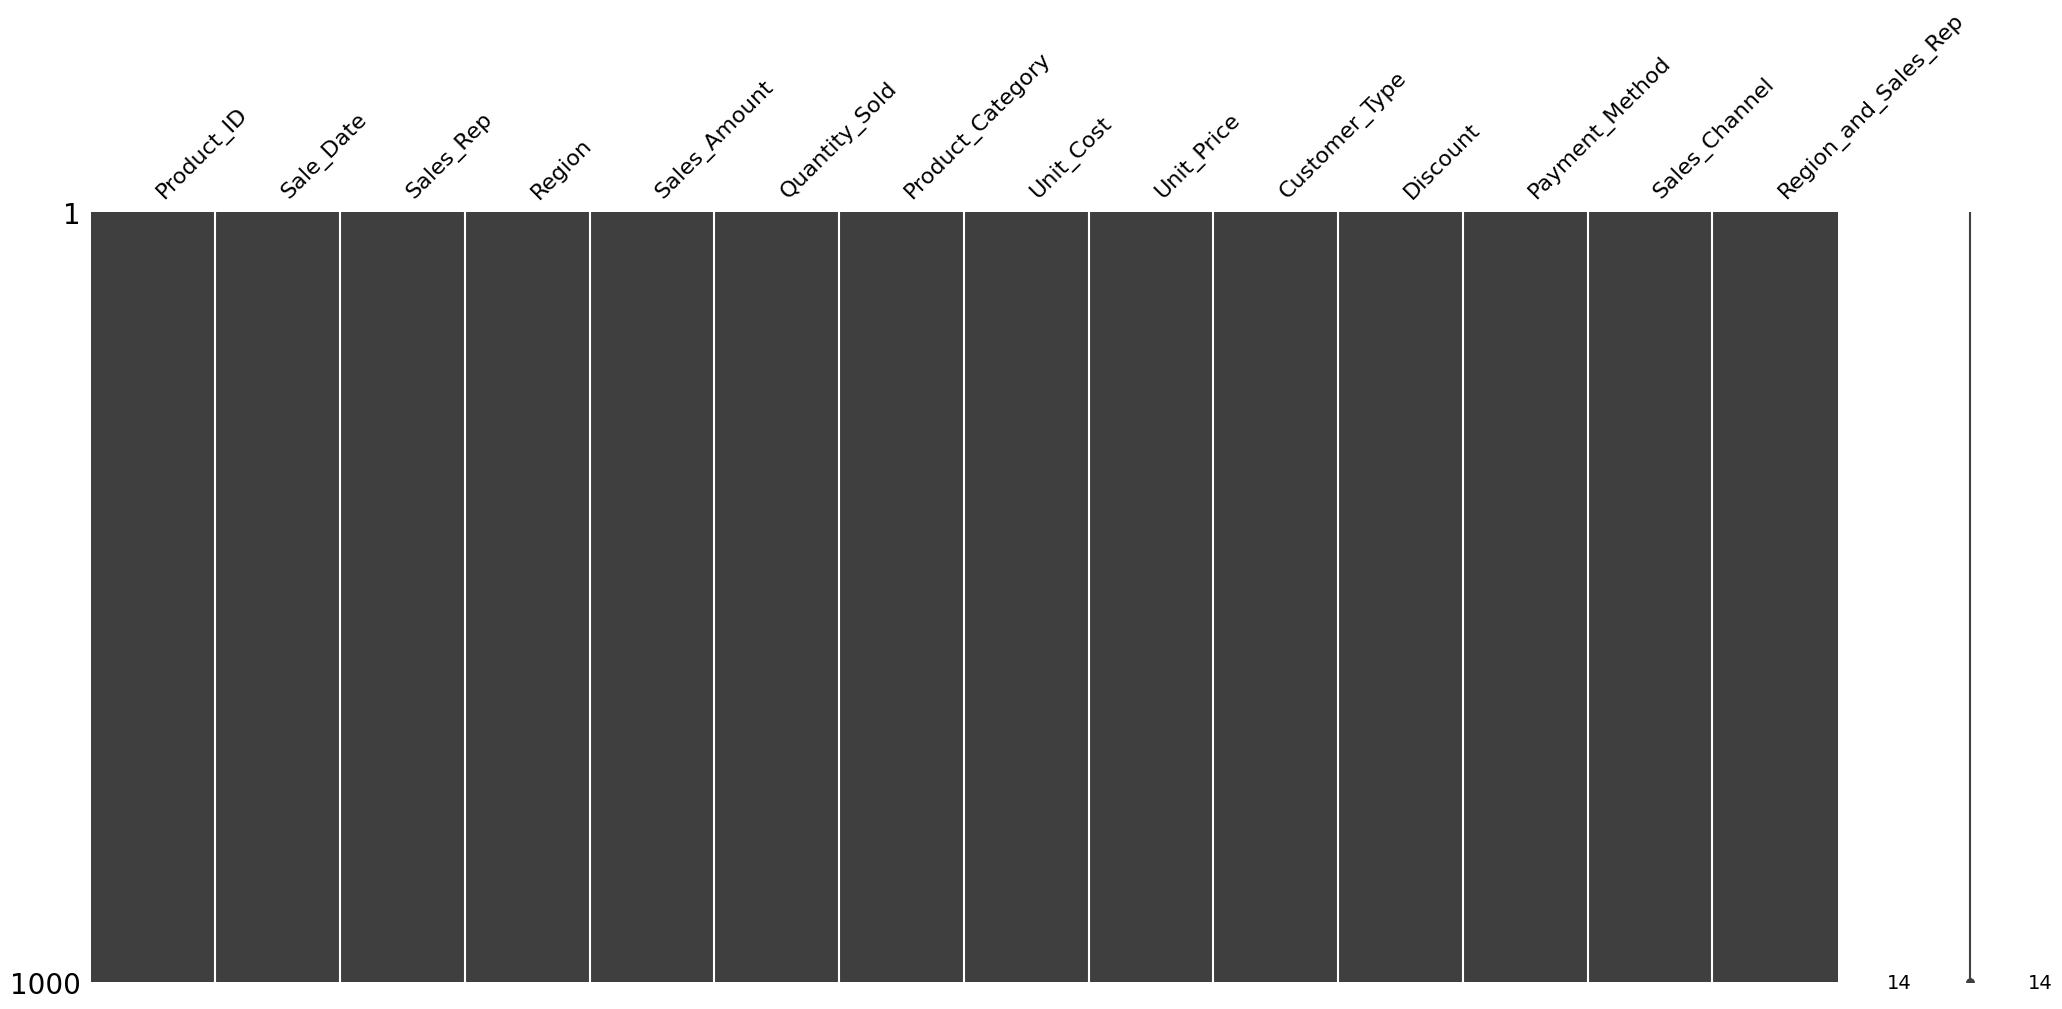

In [134]:
# Visualize missing data
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

In [135]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [136]:
# Convert 'Sale_Date' to datetime format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

<ipython-input-137-a4de6681164c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Sale_Date')['Sales_Amount'].resample('M').sum().plot(label='Monthly Sales', marker='o')
<ipython-input-137-a4de6681164c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Sale_Date')['Sales_Amount'].resample('M').sum().rolling(window=3).mean().plot(label='3-Month Moving Avg', linestyle='--', color='red')


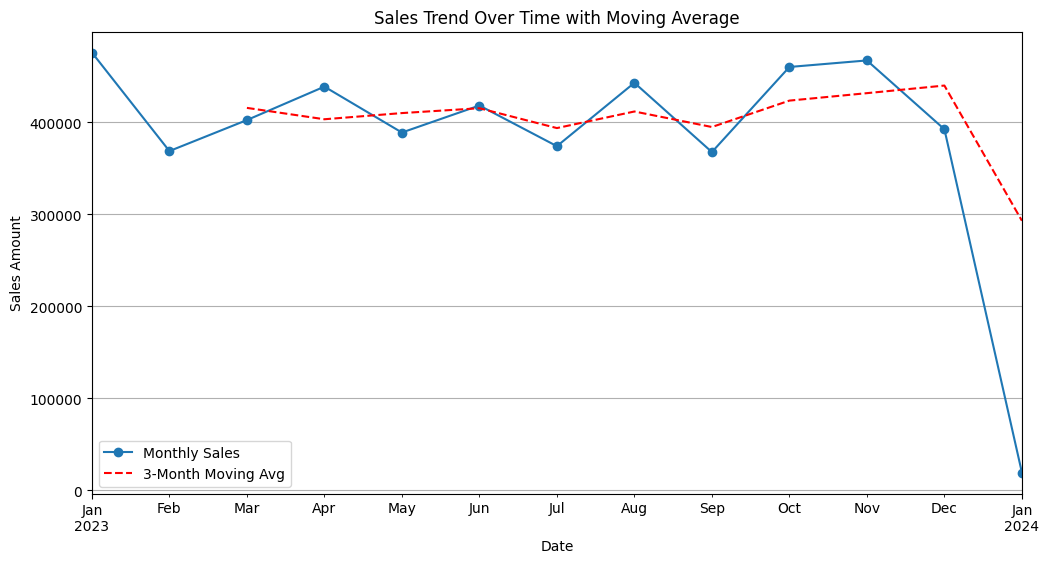

In [137]:
# --- Sales Trend Over Time with Moving Average ---
plt.figure(figsize=(12, 6))
df.set_index('Sale_Date')['Sales_Amount'].resample('M').sum().plot(label='Monthly Sales', marker='o')
df.set_index('Sale_Date')['Sales_Amount'].resample('M').sum().rolling(window=3).mean().plot(label='3-Month Moving Avg', linestyle='--', color='red')
plt.legend()
plt.title("Sales Trend Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

In [138]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


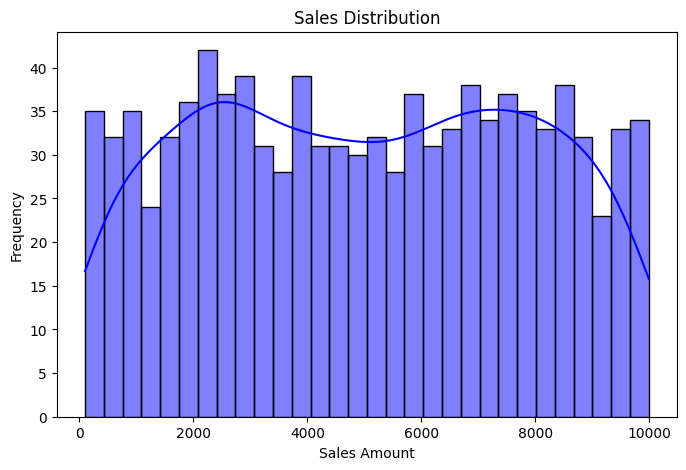

In [139]:
# --- Sales Distribution Histogram ---
plt.figure(figsize=(8,5))
sns.histplot(df['Sales_Amount'], bins=30, kde=True, color='blue')
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

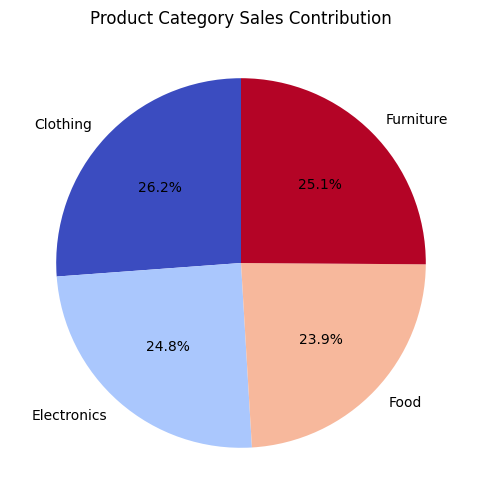

In [140]:
# --- Product Category Sales Contribution (Pie Chart) ---
plt.figure(figsize=(8, 6))
df.groupby('Product_Category')['Sales_Amount'].sum().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title("Product Category Sales Contribution")
plt.ylabel("")  # Hide y-label
plt.show()

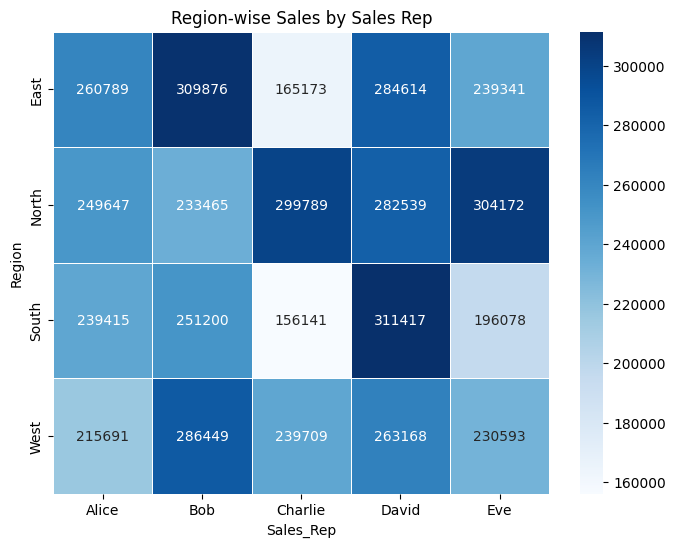

In [141]:
# --- Region-wise Sales Heatmap ---
plt.figure(figsize=(8,6))
region_sales = df.pivot_table(index='Region', columns='Sales_Rep', values='Sales_Amount', aggfunc='sum')
sns.heatmap(region_sales, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Region-wise Sales by Sales Rep")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

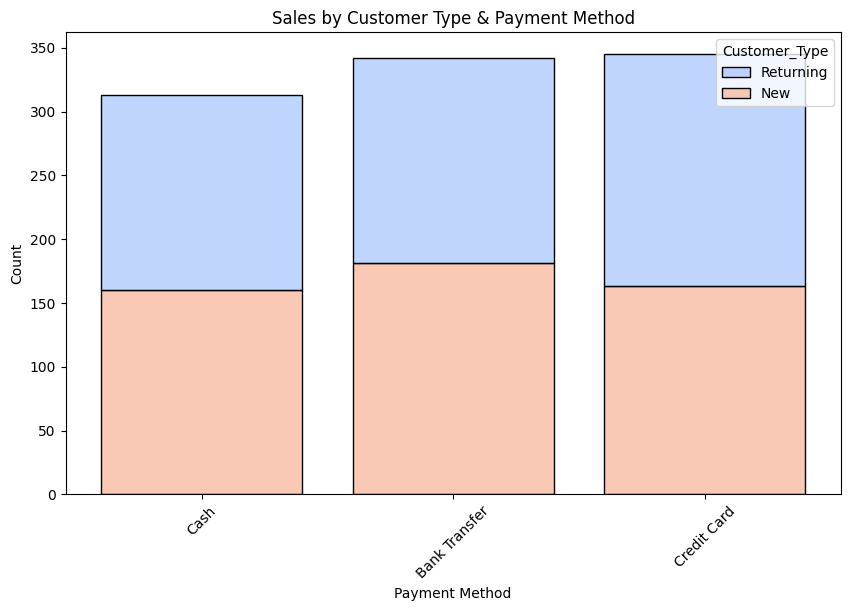

In [142]:
# --- Sales by Customer Type & Payment Method (Stacked Bar Chart) ---
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Payment_Method", hue="Customer_Type", multiple="stack", shrink=0.8, palette='coolwarm')
plt.title("Sales by Customer Type & Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-143-72b41ccfc968>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Sale_Date')['Sales_Amount'].sum().plot(label='Monthly Sales', linestyle='--', color='red')


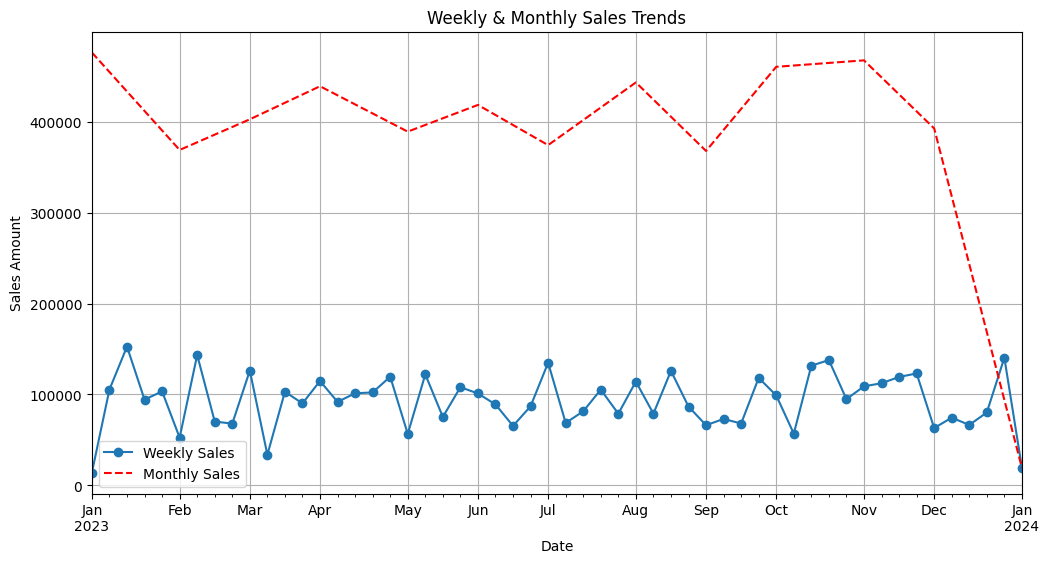

In [143]:
# Weekly & Monthly Sales Trends 
plt.figure(figsize=(12,6))
df.resample('W', on='Sale_Date')['Sales_Amount'].sum().plot(label='Weekly Sales', marker='o', linestyle='-')
df.resample('M', on='Sale_Date')['Sales_Amount'].sum().plot(label='Monthly Sales', linestyle='--', color='red')
plt.legend()
plt.title("Weekly & Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

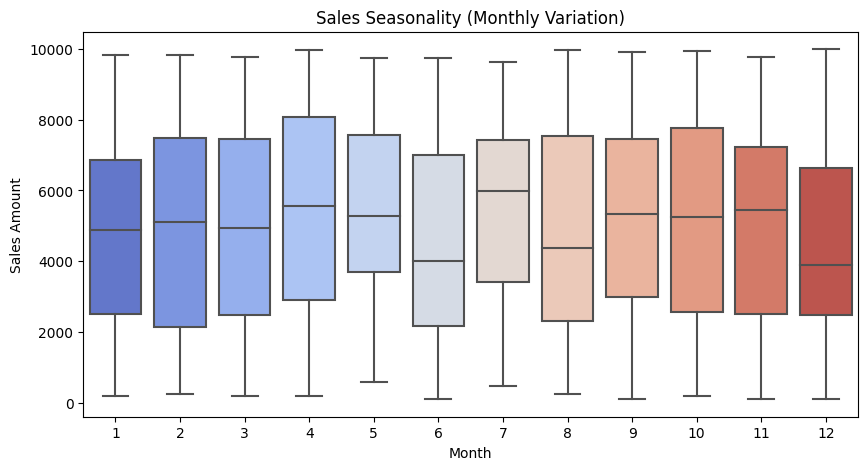

In [144]:
# Sales Seasonality (Monthly Box Plot)
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sale_Date'].dt.month, y=df['Sales_Amount'], palette='coolwarm')
plt.title("Sales Seasonality (Monthly Variation)")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.show()

In [145]:
# Year-over-Year (YoY) & Month-over-Month (MoM) Sales Growth
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month

In [146]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales_Amount'].sum().reset_index()
monthly_sales['MoM Growth (%)'] = monthly_sales['Sales_Amount'].pct_change() * 100
monthly_sales['YoY Growth (%)'] = monthly_sales['Sales_Amount'].pct_change(periods=12) * 100

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

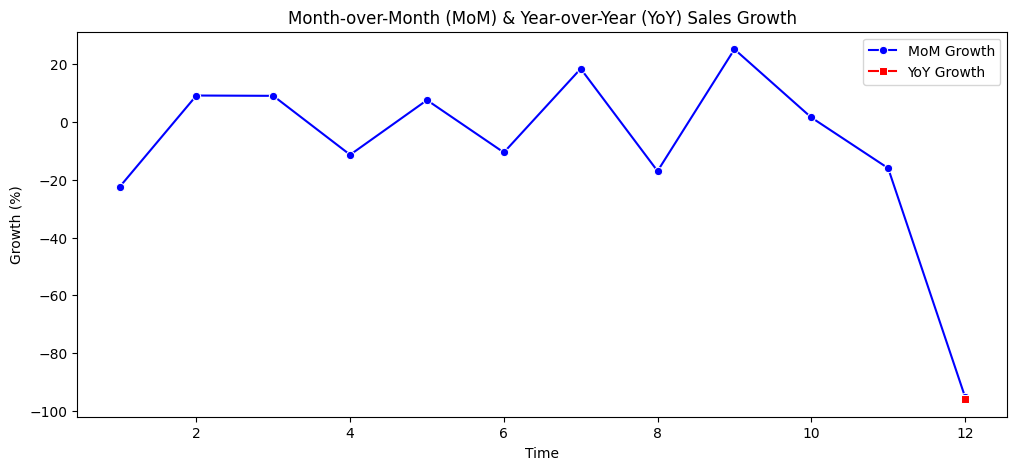

In [147]:
plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['MoM Growth (%)'], marker='o', label="MoM Growth", color='blue')
sns.lineplot(x=monthly_sales.index, y=monthly_sales['YoY Growth (%)'], marker='s', label="YoY Growth", color='red')
plt.title("Month-over-Month (MoM) & Year-over-Year (YoY) Sales Growth")
plt.xlabel("Time")
plt.ylabel("Growth (%)")
plt.legend()
plt.show()

<ipython-input-148-e6e639181845>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales_Rep', y='Sales_Amount', data=df, estimator=sum, ci=None, palette='coolwarm')


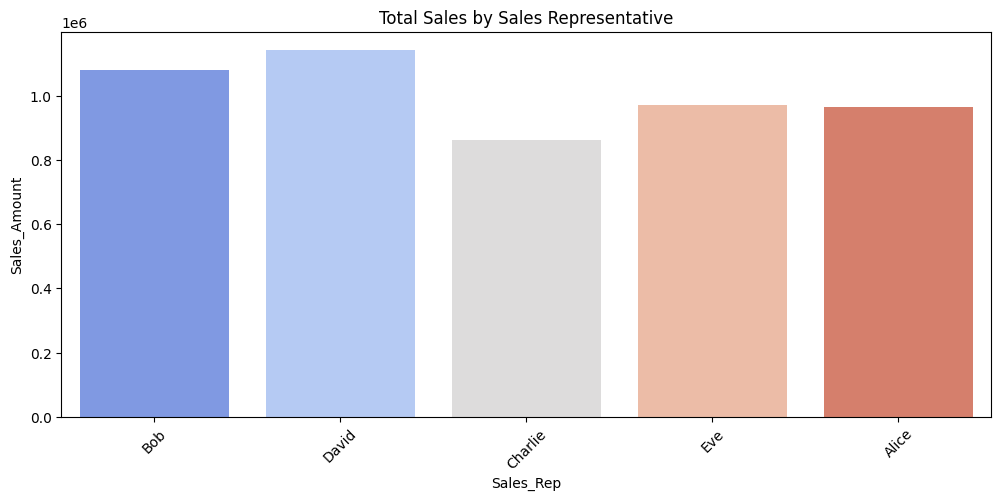

In [148]:
# Sales Performance by Sales Representatives 
plt.figure(figsize=(12,5))
sns.barplot(x='Sales_Rep', y='Sales_Amount', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title("Total Sales by Sales Representative")
plt.xticks(rotation=45)
plt.show()

In [149]:
# --- 6. Top 5 & Bottom 5 Performing Products ---
# Top 5 & Bottom 5 Performing Products ---
top_products = df.groupby('Product_ID')['Sales_Amount'].sum().nlargest(5)
bottom_products = df.groupby('Product_ID')['Sales_Amount'].sum().nsmallest(5)

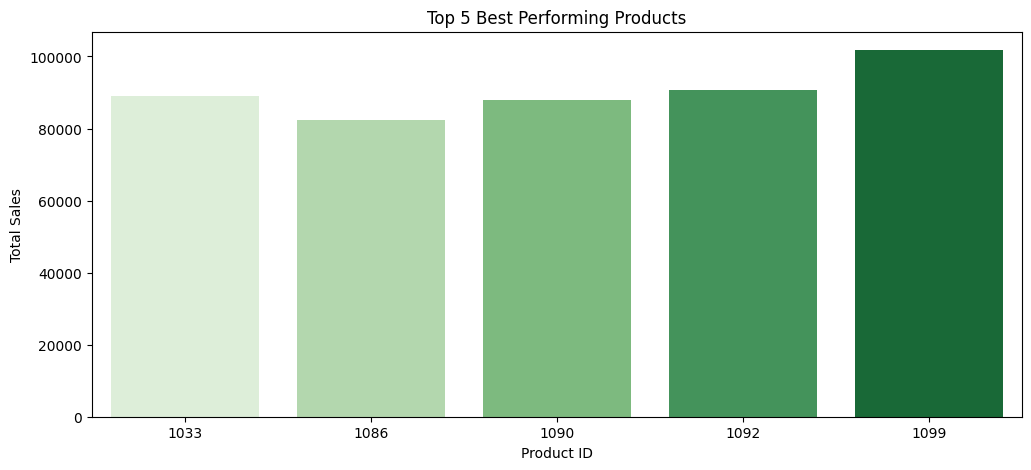

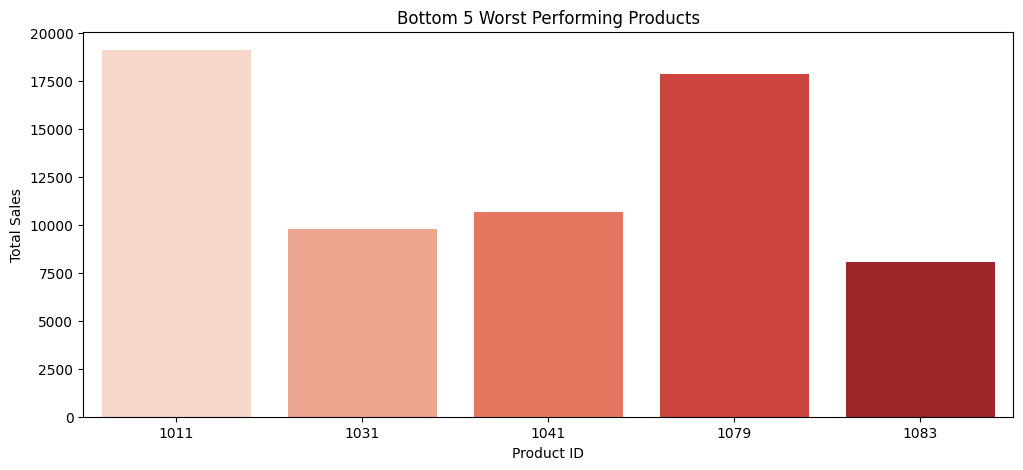

In [150]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='Greens')
plt.title("Top 5 Best Performing Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=bottom_products.index, y=bottom_products.values, palette='Reds')
plt.title("Bottom 5 Worst Performing Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

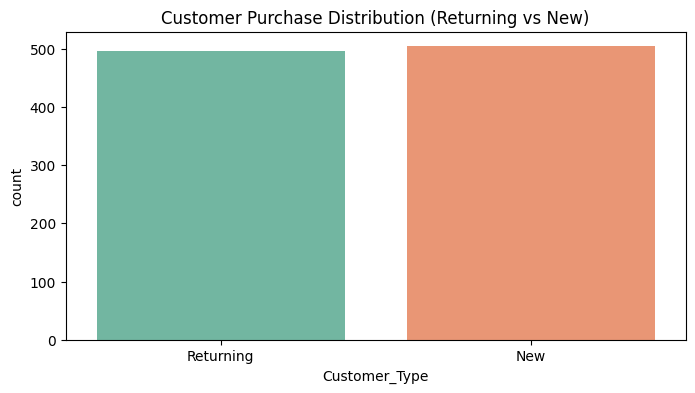

In [151]:
# Customer Purchase Pattern (Returning vs New) ---
plt.figure(figsize=(8,4))
sns.countplot(x='Customer_Type', data=df, palette='Set2')
plt.title("Customer Purchase Distribution (Returning vs New)")
plt.show()

In [152]:
daily_sales = df.groupby('Sale_Date')['Sales_Amount'].sum().reset_index()

In [153]:
daily_sales 

,Sale_Date,Sales_Amount
0,2023-01-01,14141.12
1,2023-01-02,6452.79
2,2023-01-03,21319.08
3,2023-01-04,30175.06
4,2023-01-05,16708.75
...,...,...
335,2023-12-28,7976.44
336,2023-12-29,20842.53
337,2023-12-30,26107.95
338,2023-12-31,28608.37


In [154]:
daily_sales.rename(columns={'Sale_Date': 'ds', 'Sales_Amount': 'y'}, inplace=True)

In [155]:
daily_sales 

,ds,y
0,2023-01-01,14141.12
1,2023-01-02,6452.79
2,2023-01-03,21319.08
3,2023-01-04,30175.06
4,2023-01-05,16708.75
...,...,...
335,2023-12-28,7976.44
336,2023-12-29,20842.53
337,2023-12-30,26107.95
338,2023-12-31,28608.37


In [156]:
# **Train-Test Split** (80% Train, 20% Test)
train_size = int(len(daily_sales) * 0.8)
train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]  # Ensure correct slicing

In [157]:
from prophet import Prophet
model = Prophet()
model.fit(train)

04:54:15 - cmdstanpy - INFO - Chain [1] start processing
04:54:15 - cmdstanpy - INFO - Chain [1] done processing


In [158]:
future = model.make_future_dataframe(periods=len(test))  
forecast = model.predict(future)

In [159]:
forecast_test = forecast[['ds', 'yhat']]
test = test.merge(forecast_test, on='ds', how='left')

In [171]:

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Percentage Errors
mae_percent = (mae / test['y'].mean()) * 100
mse_percent = (mse / (test['y'].mean() ** 2)) * 100  
rmse_percent = (rmse / test['y'].mean()) * 100

# Print Results as Percentages
print(f" Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f" Mean Squared Error (MSE): {mse_percent:.2f}%")
print(f" Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

 Mean Absolute Error (MAE): 55.55%
 Mean Squared Error (MSE): 53.42%
 Root Mean Squared Error (RMSE): 73.09%


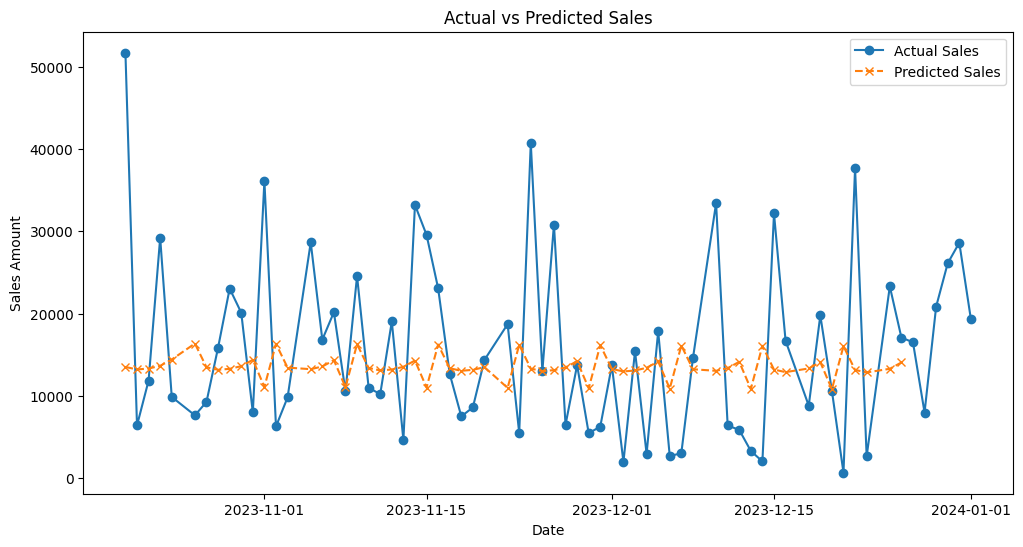

In [162]:
# Plot Actual vs Predicted Sales
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label="Actual Sales", marker='o')
plt.plot(test['ds'], test['yhat'], label="Predicted Sales", linestyle="dashed", marker='x')
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [163]:
future = model.make_future_dataframe(periods=180)  # 180 days = 6 months
forecast = model.predict(future)

In [176]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2024-03-28,12757.170874,4751.853447,26560.893147,12757.149303,12757.191785,2719.374562,2719.374562,2719.374562,2719.374562,2719.374562,2719.374562,0.0,0.0,0.0,15476.545436
433,2024-03-29,12751.445474,2124.271034,22742.723384,12751.423683,12751.466650,-159.638381,-159.638381,-159.638381,-159.638381,-159.638381,-159.638381,0.0,0.0,0.0,12591.807093
434,2024-03-30,12745.720074,2117.528756,22627.081402,12745.698094,12745.741566,-461.313662,-461.313662,-461.313662,-461.313662,-461.313662,-461.313662,0.0,0.0,0.0,12284.406412
435,2024-03-31,12739.994674,1030.859776,22486.438533,12739.972464,12740.016483,-338.819597,-338.819597,-338.819597,-338.819597,-338.819597,-338.819597,0.0,0.0,0.0,12401.175078
436,2024-04-01,12734.269275,1398.427857,23107.736005,12734.246847,12734.291343,-7.701227,-7.701227,-7.701227,-7.701227,-7.701227,-7.701227,0.0,0.0,0.0,12726.568048
437,2024-04-02,12728.543875,1985.438266,24469.893378,12728.521211,12728.566187,766.416891,766.416891,766.416891,766.416891,766.416891,766.416891,0.0,0.0,0.0,13494.960766
438,2024-04-03,12722.818475,297.356168,21150.774174,12722.795529,12722.840948,-2518.318587,-2518.318587,-2518.318587,-2518.318587,-2518.318587,-2518.318587,0.0,0.0,0.0,10204.499888
439,2024-04-04,12717.093075,4200.779274,26493.683452,12717.070000,12717.115731,2719.374562,2719.374562,2719.374562,2719.374562,2719.374562,2719.374562,0.0,0.0,0.0,15436.467637
440,2024-04-05,12711.367675,1968.636964,23817.844693,12711.344393,12711.390482,-159.638381,-159.638381,-159.638381,-159.638381,-159.638381,-159.638381,0.0,0.0,0.0,12551.729294
441,2024-04-06,12705.642275,1031.118701,23353.485451,12705.618782,12705.665232,-461.313662,-461.313662,-461.313662,-461.313662,-461.313662,-461.313662,0.0,0.0,0.0,12244.328614
